In [67]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

In [68]:
data=pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [69]:
x=data.iloc[:,2:4].values
y=data.iloc[:,-1].values

In [70]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [71]:
accuracy=[]
for i in range(1,100):
    knn=KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    accuracy.append(accuracy_score(y_test,knn.predict(X_test)))
    

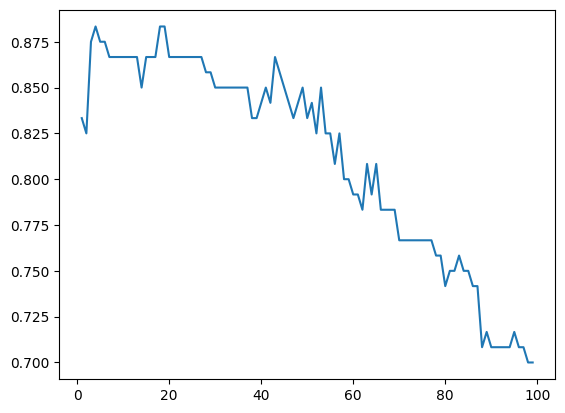

In [72]:
i=[ i for i in range(1,100)]
plt.plot(i,accuracy)

<Axes: >

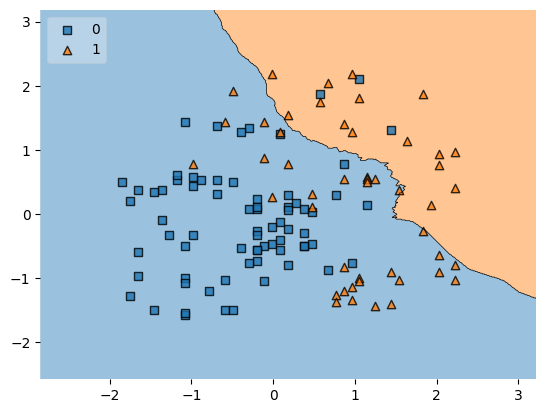

In [73]:
plot_decision_regions(X_test,y_test,knn,legend=2)

In [74]:
Y_pred=knn.predict(X_test)
confusion_matrix(y_test,Y_pred)

array([[69,  3],
       [33, 15]], dtype=int64)

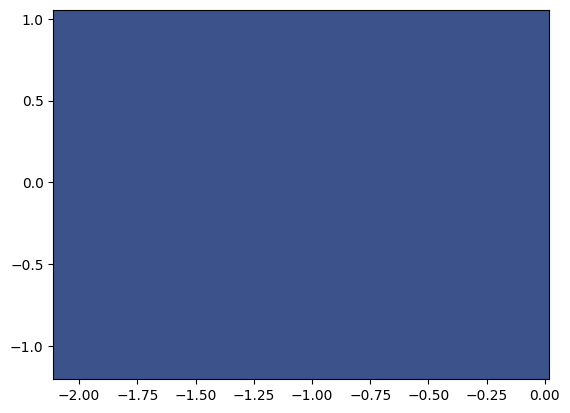

In [75]:
a=np.arange(X_train[0].min()-1,X_train[0].max()+1,0.01)
b=np.arange(X_train[1].min()-1,X_train[1].max()+1,0.01)
xx,yy=np.meshgrid(a,b)
z=np.array([xx.ravel(),yy.ravel()]).T
ans=knn.predict(z)
plt.contourf(xx,yy,ans.reshape(xx.shape))

In [78]:
xx.shape

(227, 214)